<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.340746,41.836166,69.151474,60.211408,1.261777,277.801571,276.208648,1.592923
1,0.0,1.0,57.279495,98.962890,66.547389,36.353562,4.542867,273.686202,269.454258,4.231944
2,0.0,2.0,47.483563,48.053935,78.177174,38.080212,5.690085,227.484969,221.648665,5.836304
3,0.0,3.0,22.540419,50.401236,57.423132,37.901400,8.575371,186.841558,177.511743,9.329815
4,0.0,4.0,79.760093,58.009447,89.872179,76.708410,1.957672,316.307801,314.005420,2.302381
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.119335,85.366473,22.782213,71.525564,7.923360,226.716945,219.140973,7.575972
119996,999.0,116.0,92.272678,66.556865,78.440752,37.985653,0.555539,285.811487,285.665266,0.146220
119997,999.0,117.0,95.285478,56.866141,70.731120,46.965572,13.304982,293.153293,279.896140,13.257153
119998,999.0,118.0,59.343496,89.168752,83.578519,97.295775,-0.169885,339.216657,340.369409,-1.152752


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.340746,41.836166,69.151474,60.211408,1.261777,277.801571,276.208648,1.592923
1,0.0,1.0,57.279495,98.962890,66.547389,36.353562,4.542867,273.686202,269.454258,4.231944
2,0.0,2.0,47.483563,48.053935,78.177174,38.080212,5.690085,227.484969,221.648665,5.836304
3,0.0,3.0,22.540419,50.401236,57.423132,37.901400,8.575371,186.841558,177.511743,9.329815
4,0.0,4.0,79.760093,58.009447,89.872179,76.708410,1.957672,316.307801,314.005420,2.302381
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.119335,85.366473,22.782213,71.525564,7.923360,226.716945,219.140973,7.575972
119996,999.0,116.0,92.272678,66.556865,78.440752,37.985653,0.555539,285.811487,285.665266,0.146220
119997,999.0,117.0,95.285478,56.866141,70.731120,46.965572,13.304982,293.153293,279.896140,13.257153
119998,999.0,118.0,59.343496,89.168752,83.578519,97.295775,-0.169885,339.216657,340.369409,-1.152752


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.340746  41.836166  69.151474  60.211408   1.261777   
      1.0    57.279495  98.962890  66.547389  36.353562   4.542867   
      2.0    47.483563  48.053935  78.177174  38.080212   5.690085   
      3.0    22.540419  50.401236  57.423132  37.901400   8.575371   
      4.0    79.760093  58.009447  89.872179  76.708410   1.957672   
...                ...        ...        ...        ...        ...   
999.0 115.0  29.119335  85.366473  22.782213  71.525564   7.923360   
      116.0  92.272678  66.556865  78.440752  37.985653   0.555539   
      117.0  95.285478  56.866141  70.731120  46.965572  13.304982   
      118.0  59.343496  89.168752  83.578519  97.295775  -0.169885   
      119.0  72.010918  28.557329  61.165889  64.309347  -0.865113   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    277.801571  276.208648   1.592923  
      1.0    273.686202  269.454258   4.231944  
      2.0    227.484969  221.648665   5.836304  
      3.0    186.841558  177.511743   9.329815  
      4.0    316.307801  314.005420   2.302381  
...                 ...         ...        ...  
999.0 115.0  226.716945  219.140973   7.575972  
      116.0  285.811487  285.665266   0.146220  
      117.0  293.153293  279.896140  13.257153  
      118.0  339.216657  340.369409  -1.152752  
      119.0  235.178371  236.134311  -0.955940  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.340746  41.836166  69.151474  60.211408   1.261777   
      1.0    57.279495  98.962890  66.547389  36.353562   4.542867   
      2.0    47.483563  48.053935  78.177174  38.080212   5.690085   
      3.0    22.540419  50.401236  57.423132  37.901400   8.575371   
      4.0    79.760093  58.009447  89.872179  76.708410   1.957672   
...                ...        ...        ...        ...        ...   
999.0 115.0  29.119335  85.366473  22.782213  71.525564   7.923360   
      116.0  92.272678  66.556865  78.440752  37.985653   0.555539   
      117.0  95.285478  56.866141  70.731120  46.965572  13.304982   
      118.0  59.343496  89.168752  83.578519  97.295775  -0.169885   
      119.0  72.010918  28.557329  61.165889  64.309347  -0.865113   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    277.801571  276.208648   1.592923  
      1.0    273.686202  269.454258   4.231944  
      2.0    227.484969  221.648665   5.836304  
      3.0    186.841558  177.511743   9.329815  
      4.0    316.307801  314.005420   2.302381  
...                 ...         ...        ...  
999.0 115.0  226.716945  219.140973   7.575972  
      116.0  285.811487  285.665266   0.146220  
      117.0  293.153293  279.896140  13.257153  
      118.0  339.216657  340.369409  -1.152752  
      119.0  235.178371  236.134311  -0.955940  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.340746,41.836166,69.151474,60.211408,1.261777,277.801571,276.208648,1.592923
1,0.0,1.0,57.279495,98.962890,66.547389,36.353562,4.542867,273.686202,269.454258,4.231944
2,0.0,2.0,47.483563,48.053935,78.177174,38.080212,5.690085,227.484969,221.648665,5.836304
3,0.0,3.0,22.540419,50.401236,57.423132,37.901400,8.575371,186.841558,177.511743,9.329815
4,0.0,4.0,79.760093,58.009447,89.872179,76.708410,1.957672,316.307801,314.005420,2.302381
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.119335,85.366473,22.782213,71.525564,7.923360,226.716945,219.140973,7.575972
119996,999.0,116.0,92.272678,66.556865,78.440752,37.985653,0.555539,285.811487,285.665266,0.146220
119997,999.0,117.0,95.285478,56.866141,70.731120,46.965572,13.304982,293.153293,279.896140,13.257153
119998,999.0,118.0,59.343496,89.168752,83.578519,97.295775,-0.169885,339.216657,340.369409,-1.152752


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.340746  41.836166  69.151474  60.211408   1.261777   
      1.0    57.279495  98.962890  66.547389  36.353562   4.542867   
      2.0    47.483563  48.053935  78.177174  38.080212   5.690085   
      3.0    22.540419  50.401236  57.423132  37.901400   8.575371   
      4.0    79.760093  58.009447  89.872179  76.708410   1.957672   
...                ...        ...        ...        ...        ...   
999.0 115.0  29.119335  85.366473  22.782213  71.525564   7.923360   
      116.0  92.272678  66.556865  78.440752  37.985653   0.555539   
      117.0  95.285478  56.866141  70.731120  46.965572  13.304982   
      118.0  59.343496  89.168752  83.578519  97.295775  -0.169885   
      119.0  72.010918  28.557329  61.165889  64.309347  -0.865113   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    277.801571  276.208648   1.592923  
      1.0    273.686202  269.454258   4.231944  
      2.0    227.484969  221.648665   5.836304  
      3.0    186.841558  177.511743   9.329815  
      4.0    316.307801  314.005420   2.302381  
...                 ...         ...        ...  
999.0 115.0  226.716945  219.140973   7.575972  
      116.0  285.811487  285.665266   0.146220  
      117.0  293.153293  279.896140  13.257153  
      118.0  339.216657  340.369409  -1.152752  
      119.0  235.178371  236.134311  -0.955940  

[120000 rows x 8 columns]

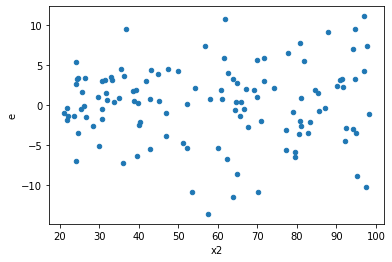

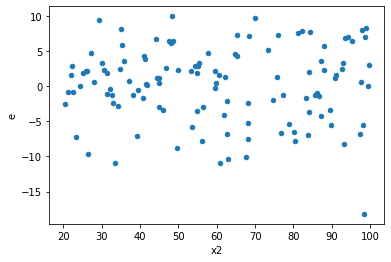

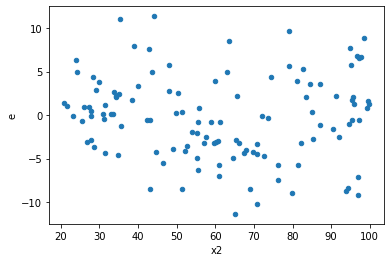

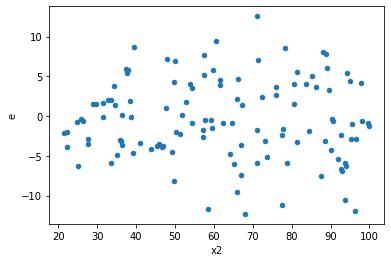

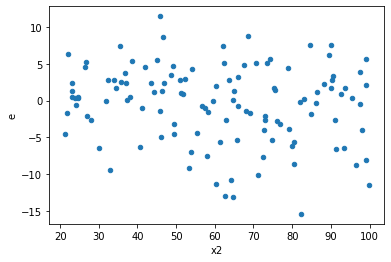

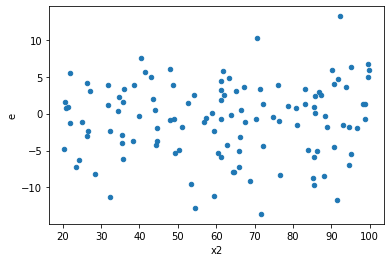

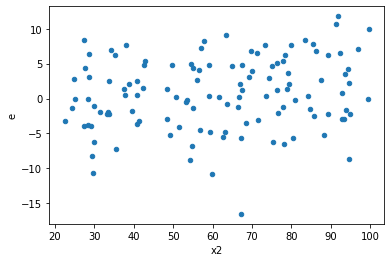

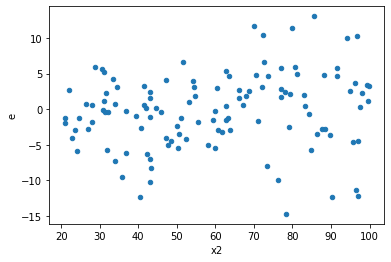

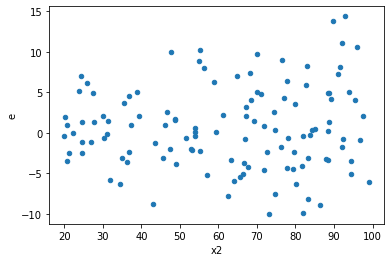

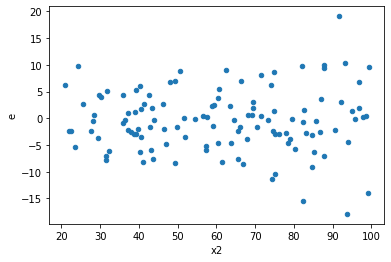

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,649.5294755443712,1979.3620535366317,14.762033535099345,44.98550121674163,3.047378337800185,0.00033541873495979146,0.9998322906325201,0.00016770936747989573,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,916.8585696971131,1185.0124559701471,20.83769476584348,26.932101272048797,1.2924702840064193,0.3981510494768008,0.8009244752615996,0.1990755247384004,Reject005=1 : Homoscedasticity
2.0,44.0,44.0,1145.352445260151,1546.5576204880438,26.03073739227616,35.14903682927372,1.3502897094149604,0.3228773708932302,0.8385613145533849,0.1614386854466151,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,514.3351147686474,1450.4023266033855,11.689434426560167,32.963689240986035,2.819955871097368,0.0008166072136537306,0.9995916963931731,0.0004083036068268653,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,811.8193420758962,1409.628822968896,18.450439592634005,32.03701870383855,1.7363824066624804,0.0705328472546014,0.9647335763726993,0.0352664236273007,Reject005=1 : Homoscedasticity
6.0,44.0,44.0,915.3787906798937,1479.7888163347125,20.80406342454304,33.6315640076071,1.616586304381824,0.11490312782257628,0.9425484360887119,0.05745156391128814,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,1124.2964043476595,1497.9499699562903,25.552191007901353,34.044317499006596,1.3323443570251676,0.3448249822748308,0.8275875088625846,0.1724124911374154,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,603.1634960912421,1225.3583705520027,13.708261274800957,27.84905387618188,2.031552603055142,0.020676195775758188,0.9896619021121209,0.010338097887879094,Reject005=0 : Heteroscedasticity
9.0,44.0,44.0,964.6407334324174,1472.6520149380165,21.92365303255494,33.46936397586401,1.5266326248716204,0.16450591077071497,0.9177470446146425,0.08225295538535748,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,649.5294755443712,1979.3620535366317,14.762033535099345,44.98550121674163,3.047378337800185,0.00033541873495979146,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,916.8585696971131,1185.0124559701471,20.83769476584348,26.932101272048797,1.2924702840064193,0.3981510494768008,Reject005=1 : Homoscedasticity
2.0,44.0,44.0,1145.352445260151,1546.5576204880438,26.03073739227616,35.14903682927372,1.3502897094149604,0.3228773708932302,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,514.3351147686474,1450.4023266033855,11.689434426560167,32.963689240986035,2.819955871097368,0.0008166072136537306,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,1508.2608610551247,1240.6909868288622,34.278655933071015,28.197522427928686,0.8225970844068179,0.5198851008056071,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,811.8193420758962,1409.628822968896,18.450439592634005,32.03701870383855,1.7363824066624804,0.0705328472546014,Reject005=1 : Homoscedasticity
6.0,44.0,44.0,915.3787906798937,1479.7888163347125,20.80406342454304,33.6315640076071,1.616586304381824,0.11490312782257628,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,1124.2964043476595,1497.9499699562903,25.552191007901353,34.044317499006596,1.3323443570251676,0.3448249822748308,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,603.1634960912421,1225.3583705520027,13.708261274800957,27.84905387618188,2.031552603055142,0.020676195775758188,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      814
Reject005=0 : Heteroscedasticity    186
Name: Result_test, dtype: int64